# ✈️ Airplane Crashes and Fatalities: An Exploratory Data Analysis

Welcome to this comprehensive Exploratory Data Analysis (EDA) on **Airplane Crashes and Fatalities** from 1908 to the present. This analysis delves into the patterns, trends, and insights derived from over a century of aviation history. 🚀

---

## 📊 Overview of the Dataset

The dataset used in this analysis is sourced from [Kaggle](https://www.kaggle.com/datasets/thedevastator/airplane-crashes-and-fatalities/data), containing information about airplane crashes and associated fatalities since 1908. It includes detailed records of over 5,000 incidents, with attributes like the date, time, location, operator, aircraft type, and the number of people aboard.

### Key Attributes:
- **Date**: The date when the crash occurred.
- **Time**: The time of the crash.
- **Location**: The geographical location of the incident.
- **Operator**: The operator or airline of the aircraft.
- **Type**: The type of aircraft involved.
- **Aboard**: The total number of people aboard the aircraft.
- **Fatalities**: The number of fatalities in the crash.
- **Ground**: The number of ground casualties.

---

## 🔍 Exploratory Data Analysis

### 1. 📅 Number of Crashes Over the Years
Understanding how the frequency of airplane crashes has changed over time provides a historical perspective.


In [1]:
import pandas as pd

# Load the dataset
file_path = 'Airplane_Crashes_and_Fatalities_Since_1908.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand the data structure
df.head()


,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [2]:
# Get general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         5268 non-null   int64  
 1   Date          5268 non-null   object 
 2   Time          3049 non-null   object 
 3   Location      5248 non-null   object 
 4   Operator      5250 non-null   object 
 5   Flight #      1069 non-null   object 
 6   Route         3561 non-null   object 
 7   Type          5241 non-null   object 
 8   Registration  4933 non-null   object 
 9   cn/In         4040 non-null   object 
 10  Aboard        5246 non-null   float64
 11  Fatalities    5256 non-null   float64
 12  Ground        5246 non-null   float64
 13  Summary       4878 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 576.3+ KB


In [3]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')

# Display the first few rows to confirm the conversion
df['Date'].head()

0   1908-09-17
1   1912-07-12
2   1913-08-06
3   1913-09-09
4   1913-10-17
Name: Date, dtype: datetime64[ns]

In [4]:
# Handle missing values by filling or dropping as necessary

# Drop rows where 'Date' is missing, as it's crucial for analysis
df = df.dropna(subset=['Date'])

# Optionally fill missing 'Time' values with a placeholder or drop if necessary
df['Time'] = df['Time'].fillna('Unknown')

# For columns like 'Flight #', 'Route', 'Registration', fill missing values with 'Unknown'
df['Flight #'] = df['Flight #'].fillna('Unknown')
df['Route'] = df['Route'].fillna('Unknown')
df['Registration'] = df['Registration'].fillna('Unknown')

# Drop rows where 'Aboard', 'Fatalities', or 'Ground' are missing, as these are crucial for analysis
df = df.dropna(subset=['Aboard', 'Fatalities', 'Ground'])

# Check for any remaining missing values
df.isnull().sum()

index              0
Date               0
Time               0
Location          19
Operator          18
Flight #           0
Route              0
Type              25
Registration       0
cn/In           1209
Aboard             0
Fatalities         0
Ground             0
Summary          382
dtype: int64

In [5]:
# Extract year and month from 'Date' for further analysis
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Display the first few rows to confirm the new features
df[['Date', 'Year', 'Month']].head()

,Date,Year,Month
0,1908-09-17,1908,9
1,1912-07-12,1912,7
2,1913-08-06,1913,8
3,1913-09-09,1913,9
4,1913-10-17,1913,10


c:\Users\LENOVO\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


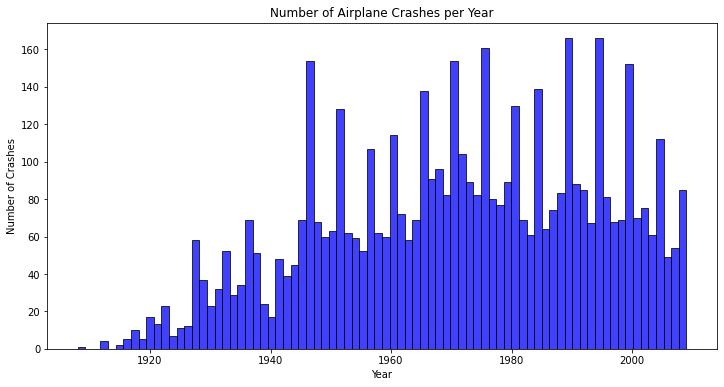

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization 1: Number of crashes per year
plt.figure(figsize=(12, 6))
sns.histplot(df['Year'], bins=80, kde=False, color='blue')
plt.title('Number of Airplane Crashes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.show()

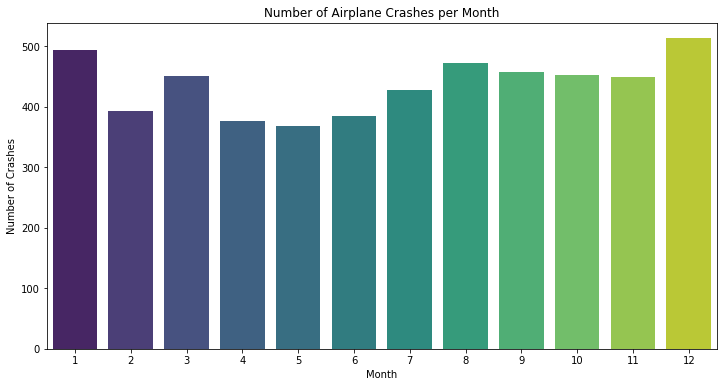

In [7]:
# Visualization 2: Number of crashes per month
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', data=df, palette='viridis')
plt.title('Number of Airplane Crashes per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.show()

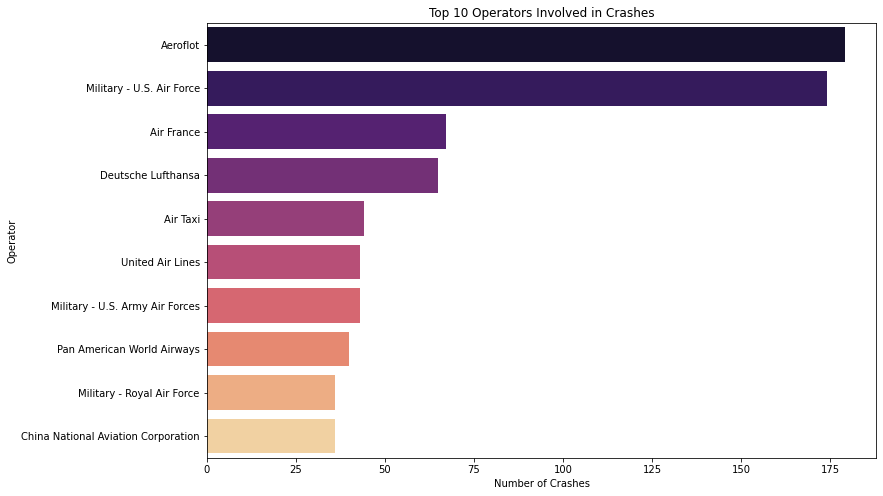

In [8]:
# Visualization 3: Top 10 operators involved in crashes
plt.figure(figsize=(12, 8))
top_operators = df['Operator'].value_counts().nlargest(10)
sns.barplot(x=top_operators.values, y=top_operators.index, palette='magma')
plt.title('Top 10 Operators Involved in Crashes')
plt.xlabel('Number of Crashes')
plt.ylabel('Operator')
plt.show()

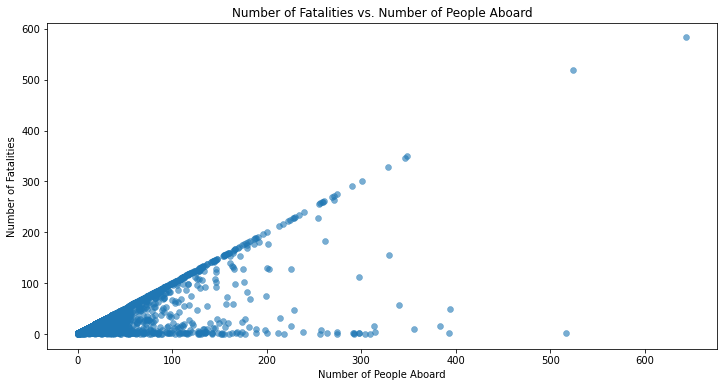

In [9]:
# Visualization 4: Relationship between number of people aboard and fatalities
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Aboard', y='Fatalities', data=df, alpha=0.6, edgecolor=None)
plt.title('Number of Fatalities vs. Number of People Aboard')
plt.xlabel('Number of People Aboard')
plt.ylabel('Number of Fatalities')
plt.show()

c:\Users\LENOVO\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


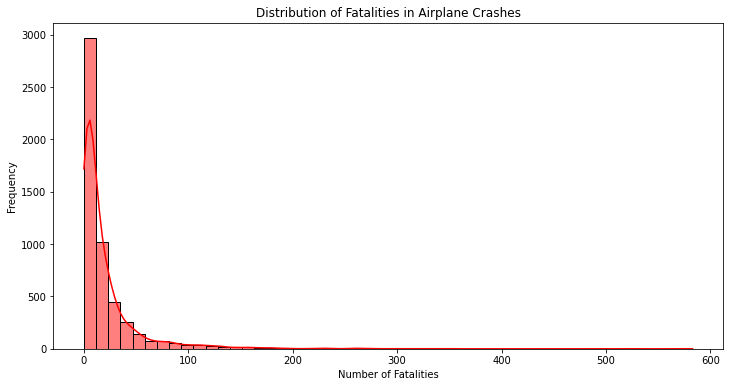

In [10]:
# Visualization 5: Distribution of the number of fatalities
plt.figure(figsize=(12, 6))
sns.histplot(df['Fatalities'], bins=50, kde=True, color='red')
plt.title('Distribution of Fatalities in Airplane Crashes')
plt.xlabel('Number of Fatalities')
plt.ylabel('Frequency')
plt.show()

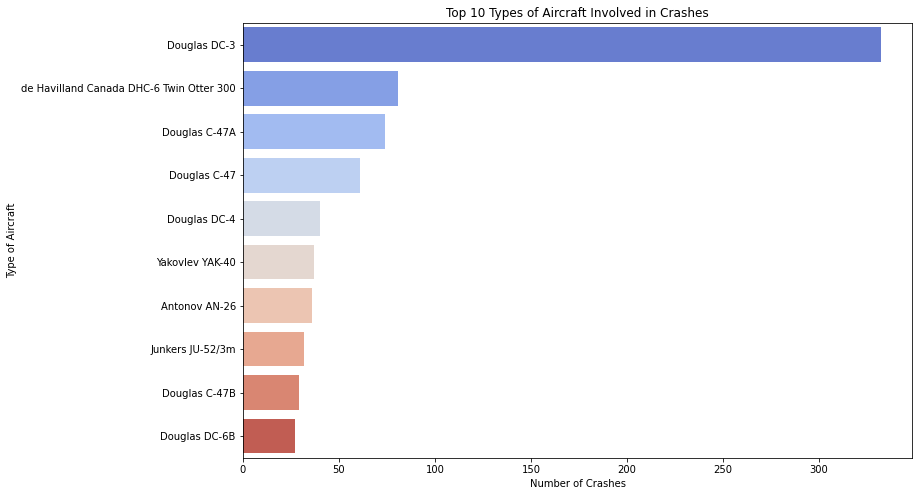

In [11]:
# Visualization 6: Top 10 types of aircraft involved in crashes
plt.figure(figsize=(12, 8))
top_types = df['Type'].value_counts().nlargest(10)
sns.barplot(x=top_types.values, y=top_types.index, palette='coolwarm')
plt.title('Top 10 Types of Aircraft Involved in Crashes')
plt.xlabel('Number of Crashes')
plt.ylabel('Type of Aircraft')
plt.show()

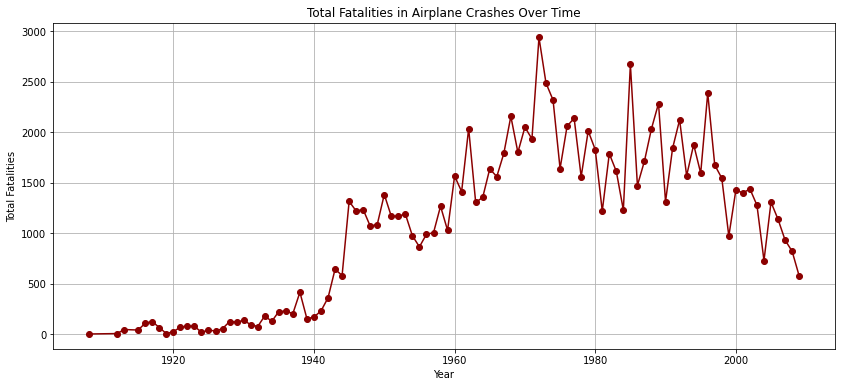

In [12]:
# Ensure we are only summing numeric columns
df_grouped_year = df.groupby('Year').sum(numeric_only=True)

# Plot the time series of total fatalities over time
plt.figure(figsize=(14, 6))
plt.plot(df_grouped_year.index, df_grouped_year['Fatalities'], marker='o', color='darkred')
plt.title('Total Fatalities in Airplane Crashes Over Time')
plt.xlabel('Year')
plt.ylabel('Total Fatalities')
plt.grid(True)
plt.show()


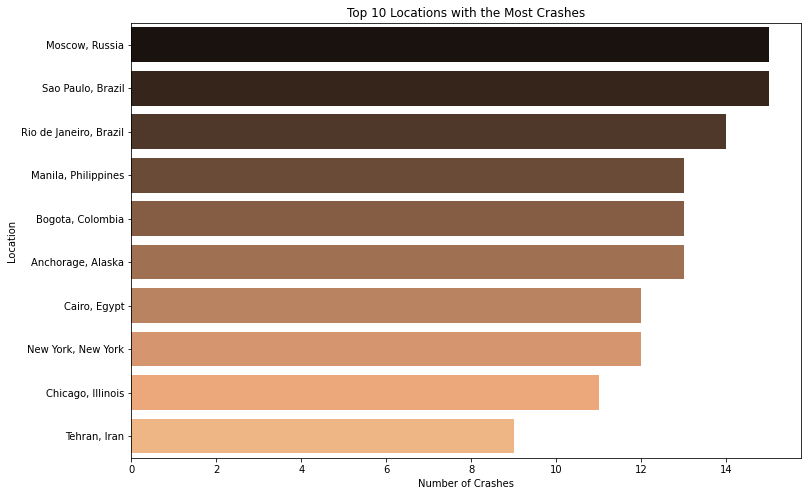

In [13]:
# Visualization 8: Top 10 locations with the most crashes
plt.figure(figsize=(12, 8))
top_locations = df['Location'].value_counts().nlargest(10)
sns.barplot(x=top_locations.values, y=top_locations.index, palette='copper')
plt.title('Top 10 Locations with the Most Crashes')
plt.xlabel('Number of Crashes')
plt.ylabel('Location')
plt.show()

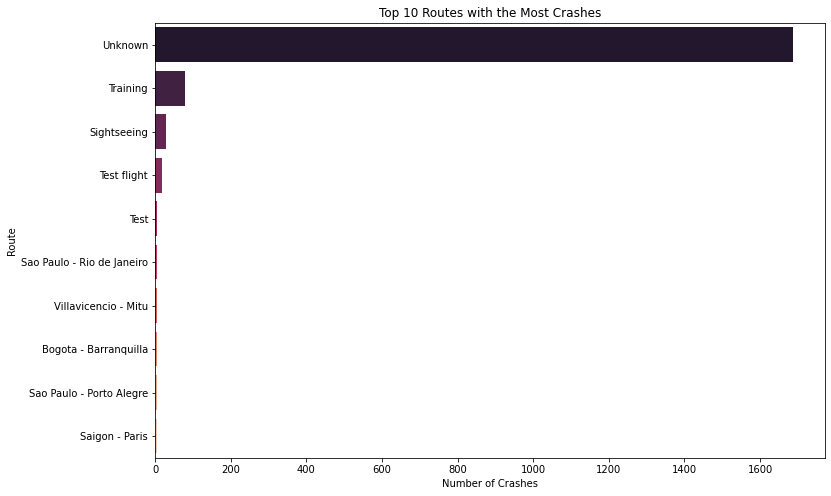

In [14]:
# Visualization 9: Number of crashes by route (Top 10)
plt.figure(figsize=(12, 8))
top_routes = df['Route'].value_counts().nlargest(10)
sns.barplot(x=top_routes.values, y=top_routes.index, palette='rocket')
plt.title('Top 10 Routes with the Most Crashes')
plt.xlabel('Number of Crashes')
plt.ylabel('Route')
plt.show()

c:\Users\LENOVO\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


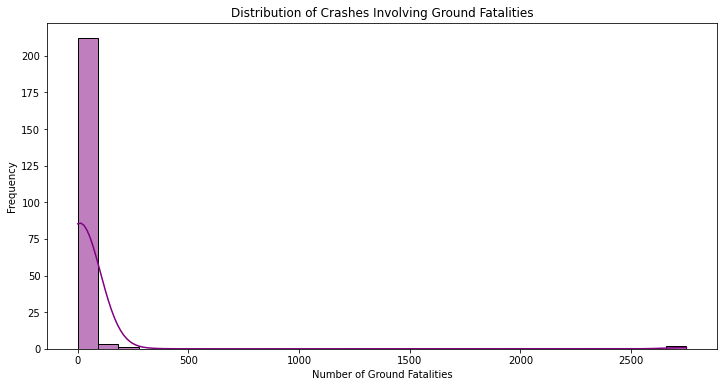

In [15]:
# Visualization 10: Distribution of crashes with ground fatalities
plt.figure(figsize=(12, 6))
ground_fatalities = df[df['Ground'] > 0]
sns.histplot(ground_fatalities['Ground'], bins=30, kde=True, color='purple')
plt.title('Distribution of Crashes Involving Ground Fatalities')
plt.xlabel('Number of Ground Fatalities')
plt.ylabel('Frequency')
plt.show()